In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage

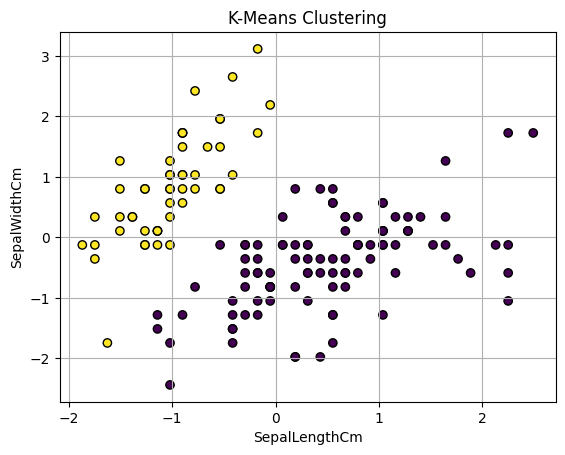

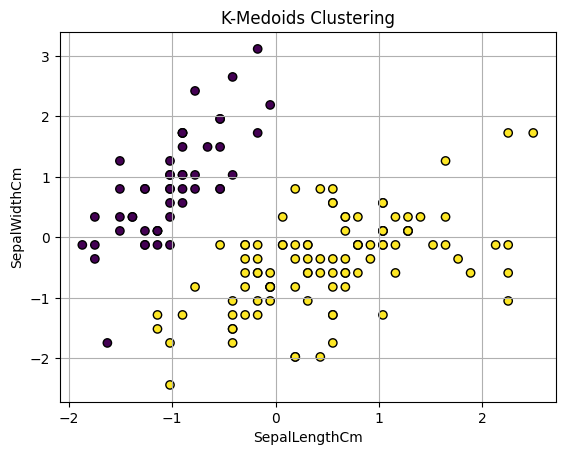

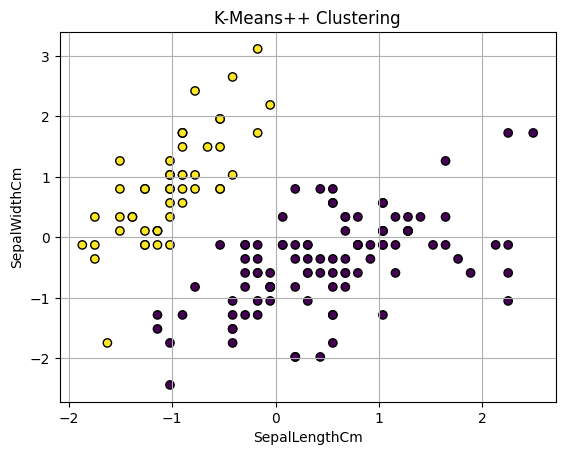

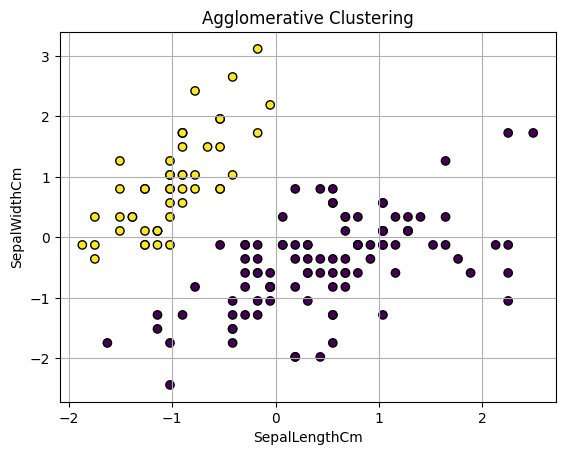

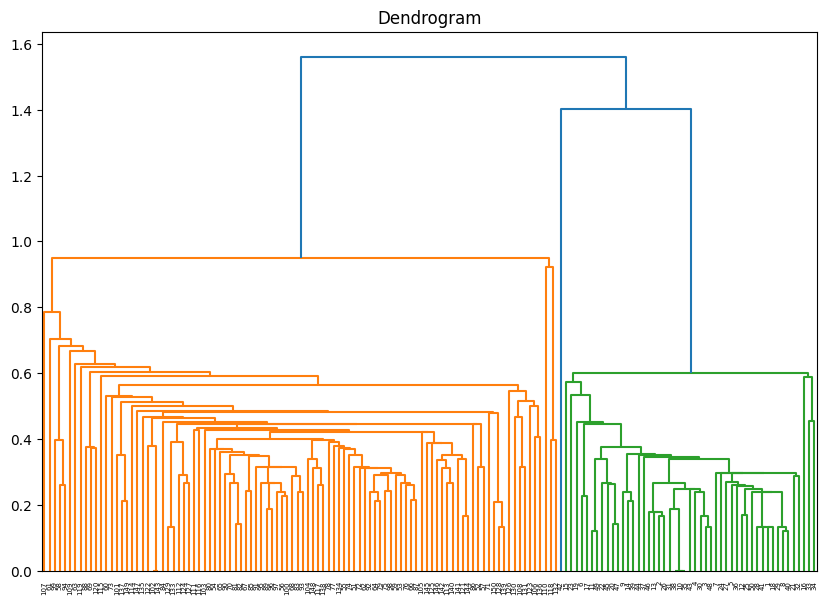

In [10]:
X = df.drop(columns=['Id', 'Species'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(X_scaled)

agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_cluster.fit_predict(X_scaled)

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.title(title)
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.grid(True)
    plt.show()

plot_clusters(X_scaled, kmeans_labels, 'K-Means Clustering')

plot_clusters(X_scaled, kmedoids_labels, 'K-Medoids Clustering')
plot_clusters(X_scaled, kmeans_plus_labels, 'K-Means++ Clustering')

plot_clusters(X_scaled, agg_labels, 'Agglomerative Clustering')

linked = linkage(X_scaled, 'single')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=np.arange(1, len(df) + 1))
plt.title('Dendrogram')
plt.show()